In [23]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import matplotlib.animation as animation
import glob, re

import scienceplots
plt.style.use('default')
plt.style.use(['science', 'high-vis', 'grid'])

In [24]:
DIR = "../build/"
file = "history_optimization.csv"

In [25]:
iteration,cost,temperature,x0 = np.loadtxt(DIR+file, delimiter=',', unpack=True, skiprows=1)

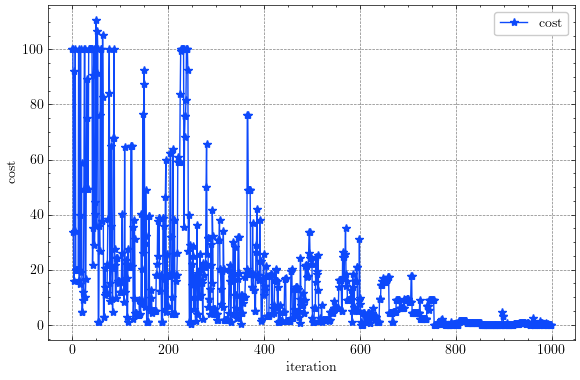

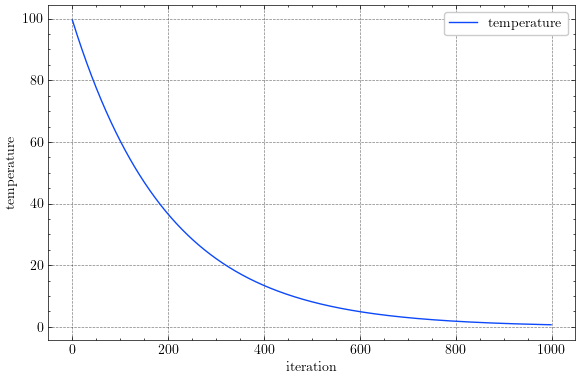

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.plot(iteration, cost, '*-', label='cost')
ax.set_xlabel('iteration')
ax.set_ylabel('cost')
ax.legend()
fig.tight_layout()

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.plot(iteration, temperature, '-', label='temperature')
ax.set_xlabel('iteration')
ax.set_ylabel('temperature')
ax.legend()
fig.tight_layout()


In [27]:
def rastrigin(x):
    x = np.array(x)
    return 10*len(x) + np.sum(x**2 - 10*np.cos(2*np.pi*x))

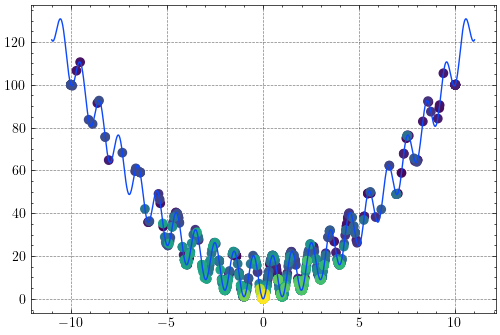

In [30]:
# Plot path of optimization on the cost function
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
x = np.linspace(-11, 11, 1000)
y = [rastrigin([xi]) for xi in x]
ax.plot(x, y, label='cost')

# Add points
colors = np.linspace(0, 1, len(iteration))
ax.scatter(x0, cost, label='points', c=colors, cmap='viridis')


999/1000

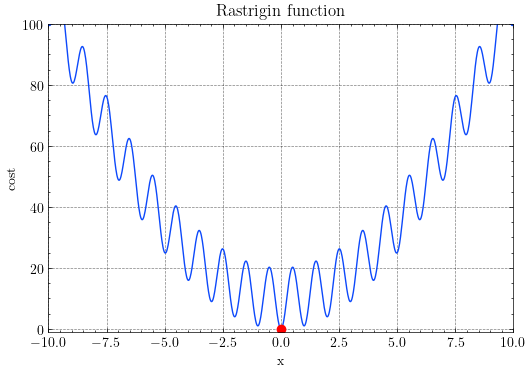

In [29]:
# Animate the path
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
x = np.linspace(-11, 11, 1000)
y = [rastrigin([xi]) for xi in x]

ax.set_xlim(-10, 10)
ax.set_ylim(-1, 100)
ax.set_xlabel('x')
ax.set_ylabel('cost')
ax.set_title('Rastrigin function')
ax.plot(x, y, label='cost')

point, = ax.plot([], [], 'o', color='red')

def init():
    point.set_data([], [])
    return point,

def animate(i):
    print(f"\r{i}/{len(iteration)}", end="")
    point.set_data(x0[i], cost[i])
    return point,

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(iteration), interval=100, blit=True) 
anim.save('optimization_path.mp4', fps=30,  dpi=300)